In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df_train = pd.read_csv("train-final.csv", header=None)
print(df_train.shape)
df_train.head()

(540, 242)


,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320,bye,5
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291,you,30
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623,thankyou,26
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313,name,20
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550,love,18


Rename "label" columns

In [86]:
df_train = df_train.rename(columns={240: "label", 241: "label_code"})

In [87]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,label_code
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,536.000000,536.000000,536.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,-0.177295,0.642214,2.331659,-0.194741,0.457941,2.371155,-0.320209,0.334582,2.317620,-0.038419,...,0.397871,0.620459,0.445361,0.452434,0.458139,0.514412,0.475896,0.419335,0.521986,15.574074
std,0.228700,0.059042,0.098388,0.233197,0.059164,0.103114,0.229459,0.057019,0.130213,0.238209,...,0.088373,0.105227,0.068612,0.087941,0.089766,0.057214,0.098693,0.086500,0.052269,8.690519
min,-0.643738,0.519223,1.984785,-0.677079,0.340365,2.043202,-0.725647,0.215896,1.958559,-0.529040,...,0.178912,0.256031,0.223113,0.191318,0.232840,0.269233,0.174655,0.213768,0.349608,1.000000
25%,-0.371009,0.610317,2.256488,-0.377390,0.426308,2.290459,-0.519382,0.299268,2.233972,-0.229325,...,0.338260,0.549861,0.403733,0.393426,0.391130,0.483939,0.410484,0.358616,0.485843,8.000000
50%,-0.147509,0.644106,2.359979,-0.182383,0.460274,2.399004,-0.313721,0.340286,2.329261,-0.054838,...,0.387029,0.621955,0.450252,0.447290,0.453992,0.520876,0.476872,0.417201,0.523685,16.000000
75%,0.029912,0.695097,2.404539,0.012955,0.512210,2.448018,-0.132110,0.376225,2.418436,0.173653,...,0.449043,0.707867,0.493773,0.501531,0.511122,0.552783,0.546360,0.476560,0.558321,23.000000
max,0.249321,0.739437,2.544698,0.246177,0.568560,2.604842,0.111452,0.461244,2.609596,0.399173,...,0.833097,0.882829,0.613585,0.793975,0.785098,0.630953,0.722162,0.664097,0.654371,30.000000


Number of labels to predict

In [88]:
df_train.label.nunique()

30

What is the frequency of labels

<AxesSubplot:>

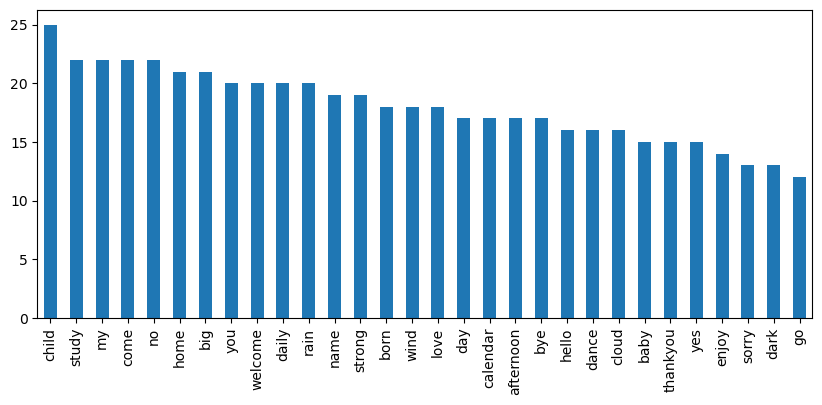

In [89]:
df_train.label.value_counts().plot(kind="bar", figsize=(10, 4))

## Missing Values

Which label type has missing values.  
7 labels have missing values.

<AxesSubplot:xlabel='label'>

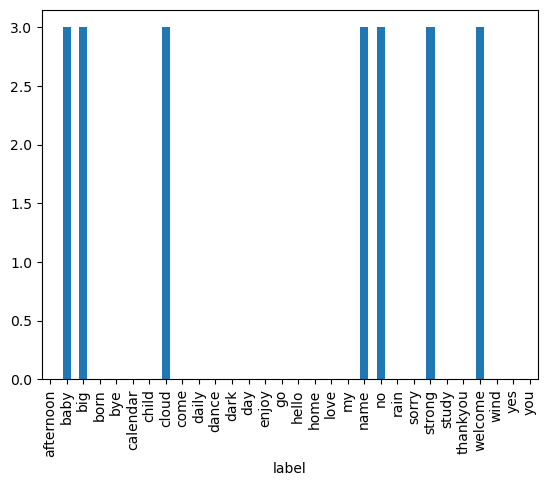

In [90]:
label_col = ["label"]
skip_cols = ["label", "label_code"]
data_cols = [col for col in df_train.columns if col not in skip_cols]

#nr_missing_per_col = df_train.isna().sum().sort_values(ascending=False)
#nr_missing_per_col#.where(nr_missing_per_col> 0)

df_train_missing = df_train[data_cols].isna()
df_train_labels = df_train[label_col]
df_train_missing = pd.concat([df_train_labels, df_train_missing], axis=1)
df_train_missing.groupby("label", as_index=True).sum().sum(axis=1).plot(kind="bar")#.groupby("label").sum()

How many rows have missing values

In [91]:
df_train_missing.select_dtypes(include="boolean").any(axis=1).sum()

7

Which columns have missing values.  
8, 7, 9, 15, 14, 16

In [92]:
df_train_missing.select_dtypes(include="boolean").sum().sort_values(ascending=False).head(7)

8     4
7     4
9     4
15    3
14    3
16    3
84    0
dtype: int64

Snapshot of rows and cols with missing data

In [93]:
rows_with_missing = df_train_missing.select_dtypes(include="boolean").any(axis=1)
rows_with_missing = rows_with_missing[rows_with_missing].index.tolist()

cols_with_missing = df_train_missing.select_dtypes(include="boolean").any(axis=0)
cols_with_missing = cols_with_missing[cols_with_missing].index.tolist()

cols = cols_with_missing + ["label"]
df_train.loc[rows_with_missing, cols]

,7,8,9,14,15,16,label
12,NaN,NaN,NaN,2.260215,0.445942,0.136730,baby
13,NaN,NaN,NaN,2.239788,0.215241,0.436800,strong
14,NaN,NaN,NaN,2.343028,0.453319,0.207182,big
15,NaN,NaN,NaN,2.326276,-0.036282,0.302366,cloud
498,0.379954,2.373748,0.059828,NaN,NaN,NaN,welcome
499,0.281203,2.059865,0.144997,NaN,NaN,NaN,name
500,0.373904,2.342377,0.057216,NaN,NaN,NaN,no


In [94]:
cond = df_train["label"] == "big"
mean_value = df_train.loc[cond, 7].mean()

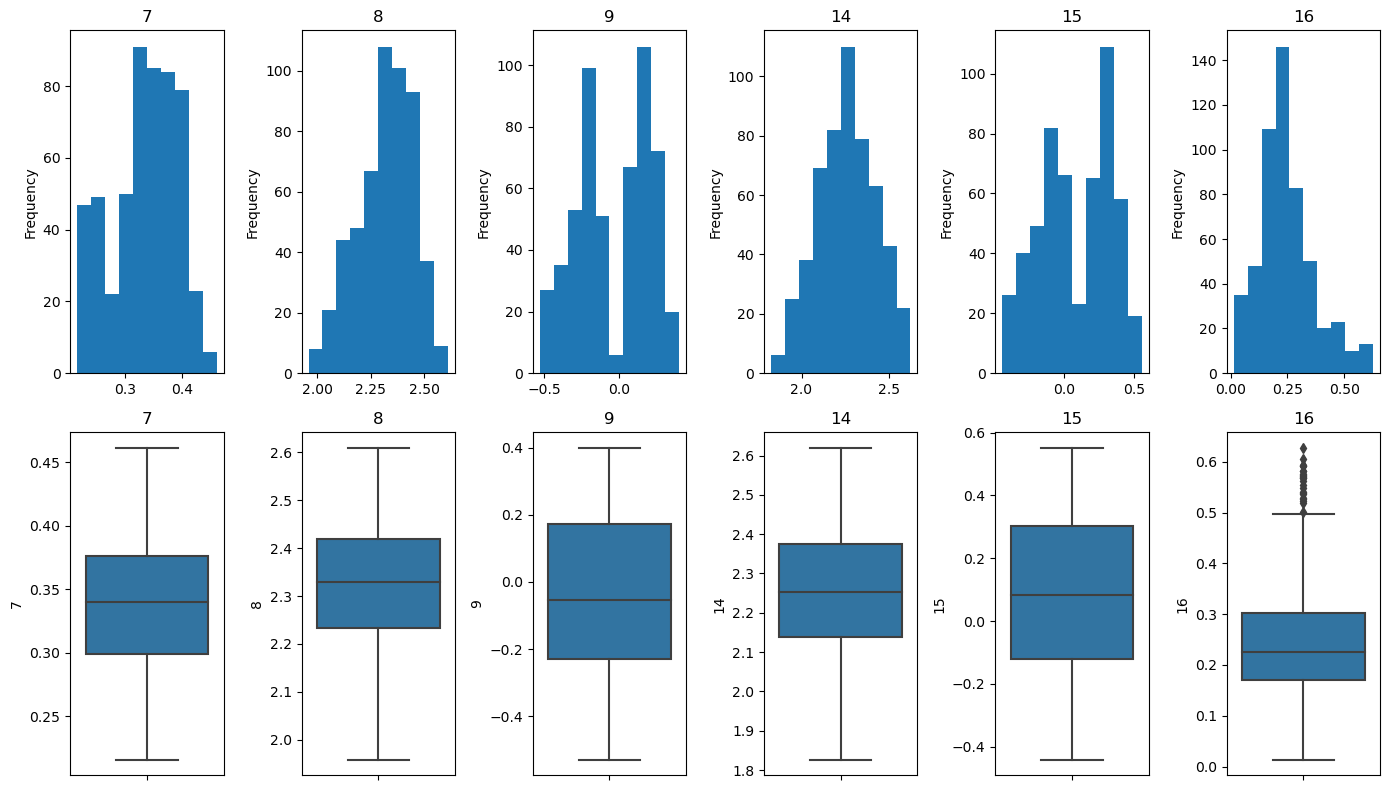

In [95]:
labels_with_missing = df_train.loc[rows_with_missing, cols]["label"].unique().tolist()

fig, ax = plt.subplots(2, 6, figsize=(14,8))

for idx, col in enumerate(cols_with_missing):
    # plot a histogram of the column for the first row
    df_train[col].plot(kind="hist", ax=ax[0, idx], title=col)
    sns.boxplot(y=df_train[col], ax=ax[1, idx]).set_title(col)

    # plot vertical lines for all values for each label in labels_with_missing with different colors
    # mean_values = []
    # for label in labels_with_missing:
    #    cond = df_train["label"] == label
    #     mean_value = df_train.loc[cond, col].mean()
    #    mean_values.append(mean_value)
    #    ax[0, idx].axvline(mean_value, color="red")
    
# add legend to plot
plt.tight_layout()


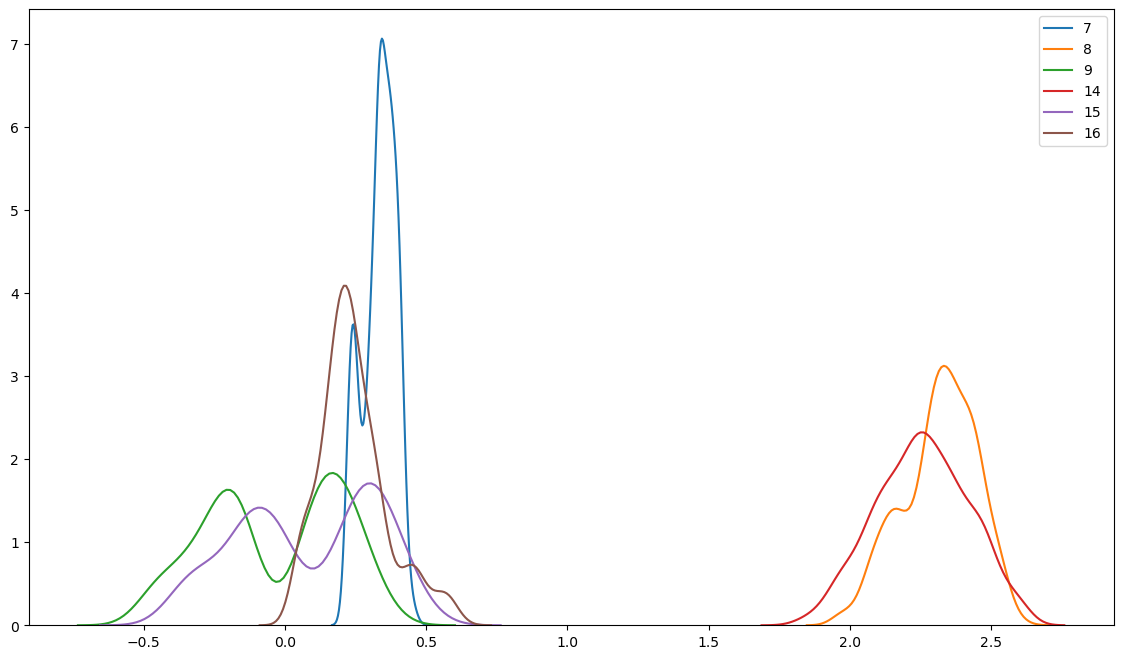

In [96]:
# plot a seaborn kdeplot for all columns in cols_with_missing
fig, ax = plt.subplots(1, 1, figsize=(14,8))
for col in cols_with_missing:

    # plot a kdeplot for each label in labels_with_missing
    #for label in labels_with_missing:
    #    cond = df_train["label"] == label
    #    sns.kdeplot(df_train.loc[cond, col], ax=ax, label=label)

    # plot a kdeplot for all values
    sns.kdeplot(df_train[col], ax=ax, label=col, )

    # add legend to plot
    plt.legend()

### Correlations for missing columns

Which other column correlates the most with the missing columns

In [97]:
corr_cols = []
corr_values = []
for col in cols_with_missing:
    df = df_train.corrwith(df_train[col]).sort_values(ascending=False).to_frame(name="corr")
    corr_value = df.iloc[1].values[0]
    corr_col = df.iloc[1].name
    corr_cols.append(corr_col)
    corr_values.append(corr_value)
    print(f"column: {col}, has highest correlation with column: {corr_col}, with value: {corr_value:.2f}")

column: 7, has highest correlation with column: 4, with value: 0.94
column: 8, has highest correlation with column: 50, with value: 0.96
column: 9, has highest correlation with column: 3, with value: 1.00
column: 14, has highest correlation with column: 20, with value: 0.91
column: 15, has highest correlation with column: 9, with value: 0.98
column: 16, has highest correlation with column: 22, with value: 0.90


Plot the value of the missing columns with the column that it correlates the most with

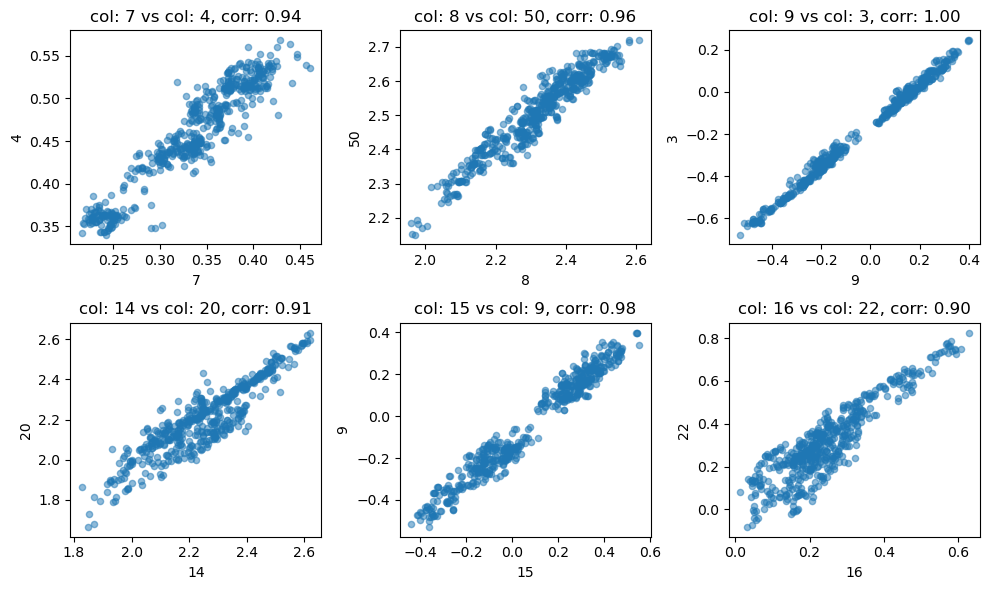

In [98]:
fig, ax = plt.subplots(2, len(corr_cols)//2, figsize=(10,6))
for idx, col in enumerate(cols_with_missing):
    
    # plot a scatter plot of missing colum vs correlation column
    df_train.plot(kind="scatter", x=col, y=corr_cols[idx], title=f"col: {col} vs col: {corr_cols[idx]}, corr: {corr_values[idx]:.2f}", ax=ax.ravel()[idx], alpha=0.5)
    
plt.tight_layout()

Check if there seems to be any pattern between the corresponding missing column and its mean value and or angle or std of angle. Get the respective values for each missing column by adding with 60

After doing this it doesnt seem to be anything useful to use from here

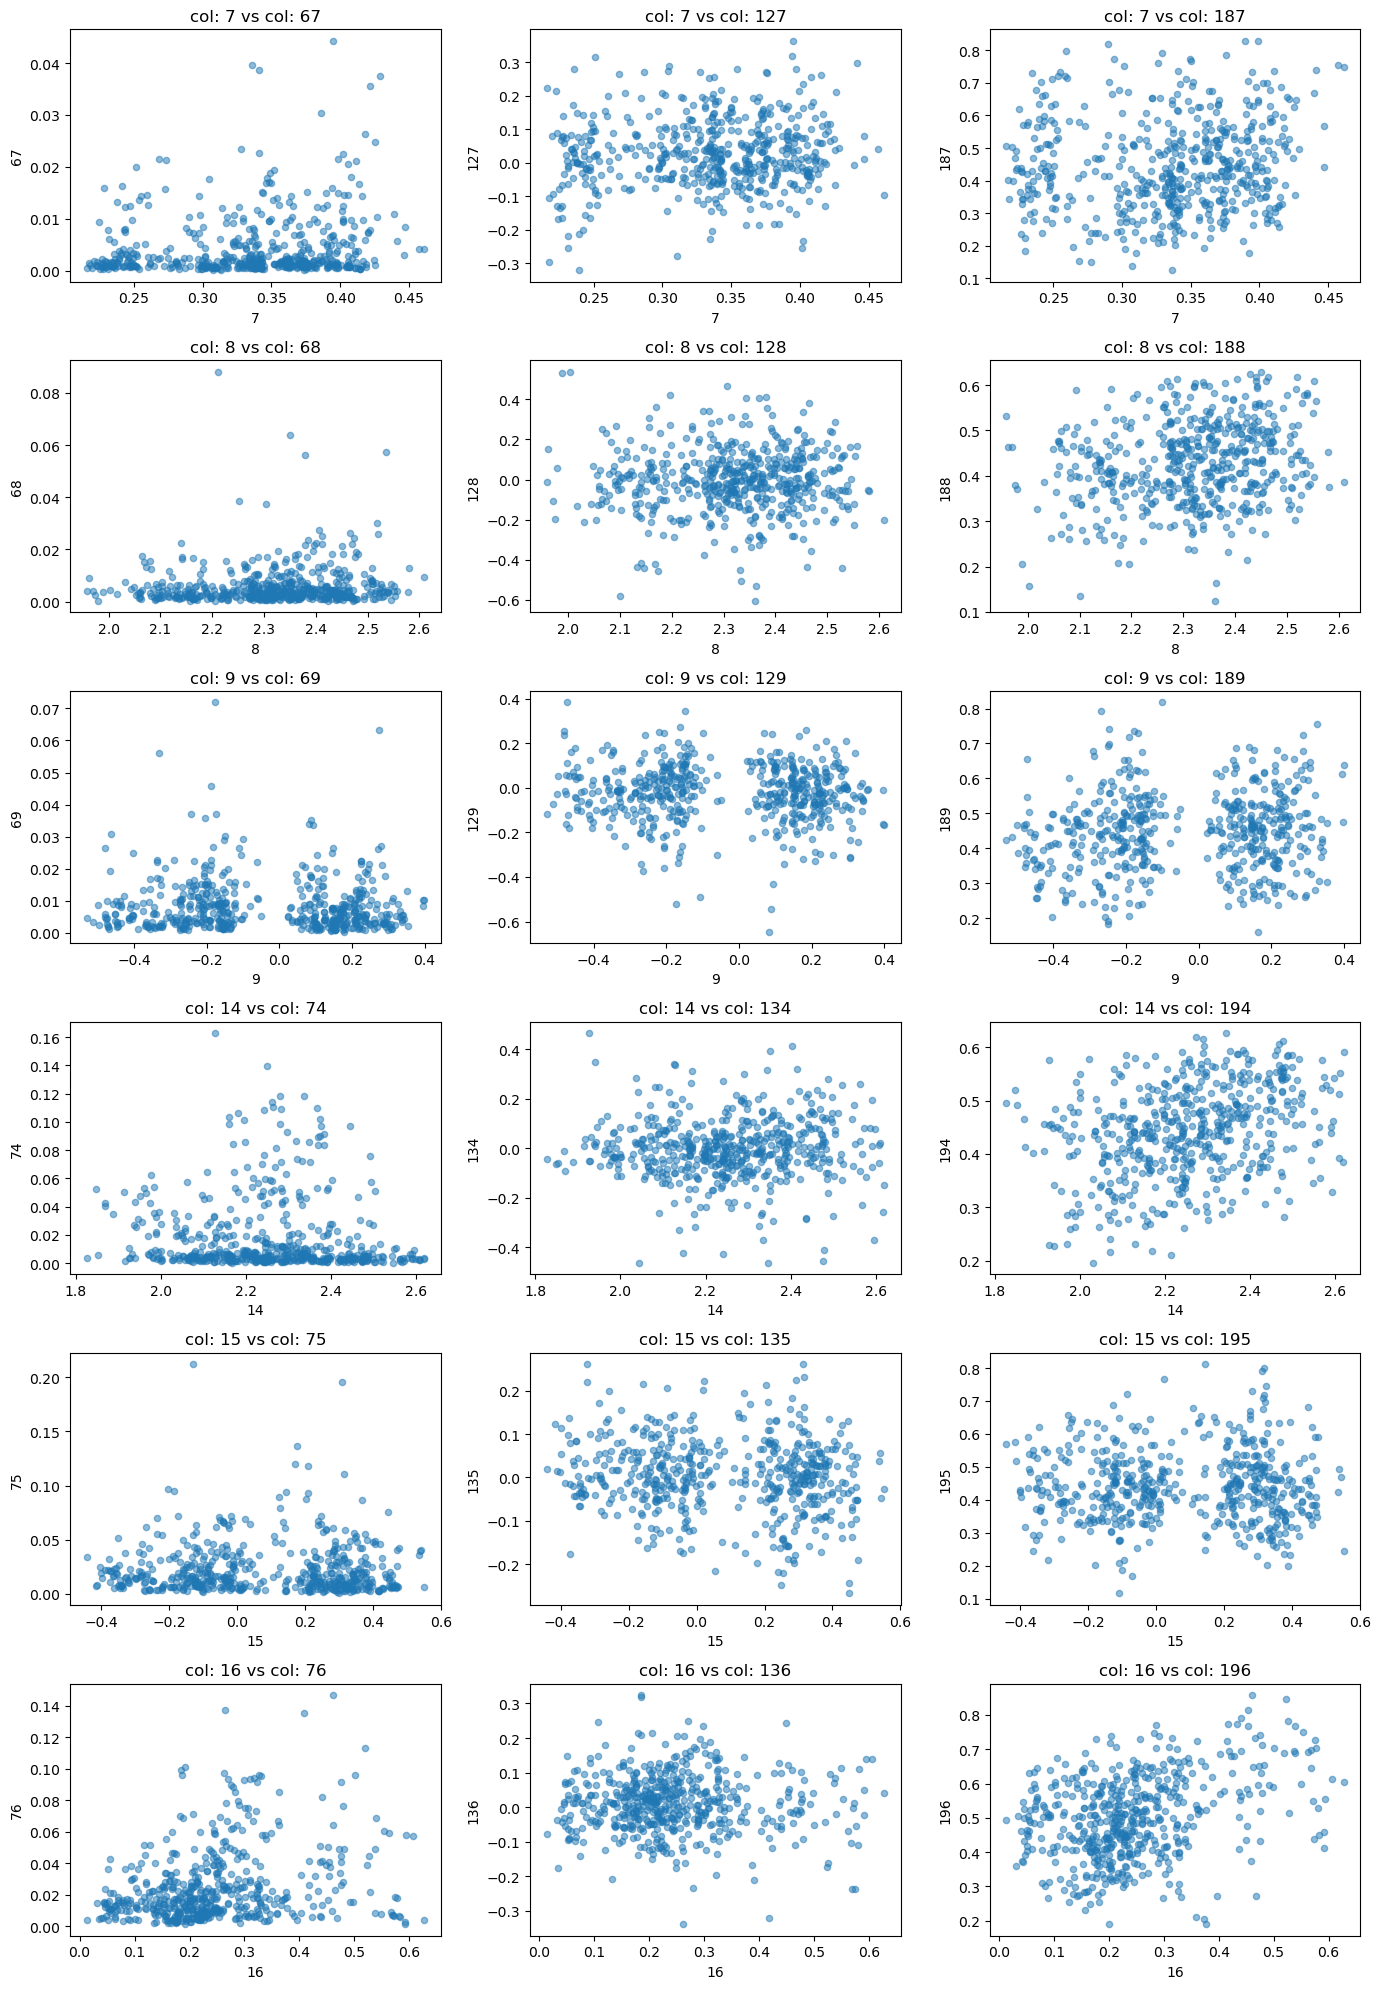

In [99]:
fig, ax = plt.subplots(6,3, figsize=(14, 20))
counter = 0
for idx, col in enumerate(cols_with_missing):
    help_col = col
    for _ in range(3):
        help_col += 60
        df_train.plot(kind="scatter", x=col, y=help_col, title=f"col: {col} vs col: {help_col}", ax=ax.ravel()[counter], alpha=0.5)
        counter += 1
plt.tight_layout()

## Try to cluster the data with kmeans to see if we can detect any patterns

In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import silhouette_score


Number of components to explain 95% of the variance: 90


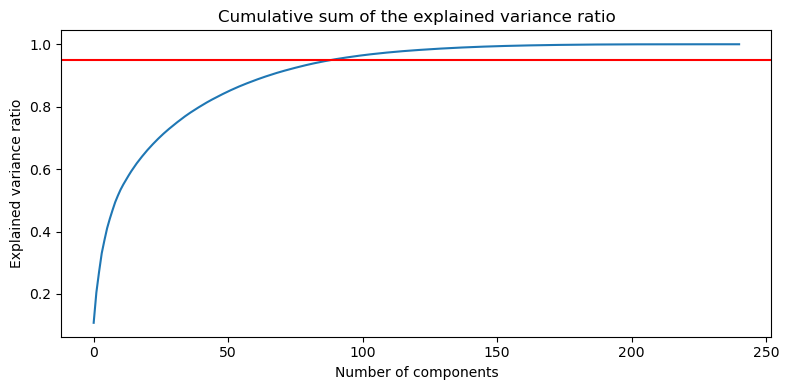

In [101]:
scaler_standard = StandardScaler()
df_train_scaled = scaler_standard.fit_transform(df_train.dropna().select_dtypes(include="number"))
pca = PCA()
# pca to reduce the number of features
pca.fit(df_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
number_components = np.argmax(cumsum >= 0.95) + 1
print(f"Number of components to explain 95% of the variance: {number_components}")

# plot the cumulative sum of the explained variance ratio
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(cumsum, label="cumulative sum")
ax.set_title(f"Cumulative sum of the explained variance ratio")
ax.set_xlabel("Number of components")
ax.set_ylabel("Explained variance ratio")
ax.axhline(0.95, color="red", label="95%")
plt.tight_layout()


Number of clusters: 2, inertia: 111696.68
Number of clusters: 3, inertia: 104735.95
Number of clusters: 4, inertia: 99364.64
Number of clusters: 5, inertia: 95595.39
Number of clusters: 6, inertia: 93132.51
Number of clusters: 7, inertia: 91001.07
Number of clusters: 8, inertia: 89071.83
Number of clusters: 9, inertia: 87725.68


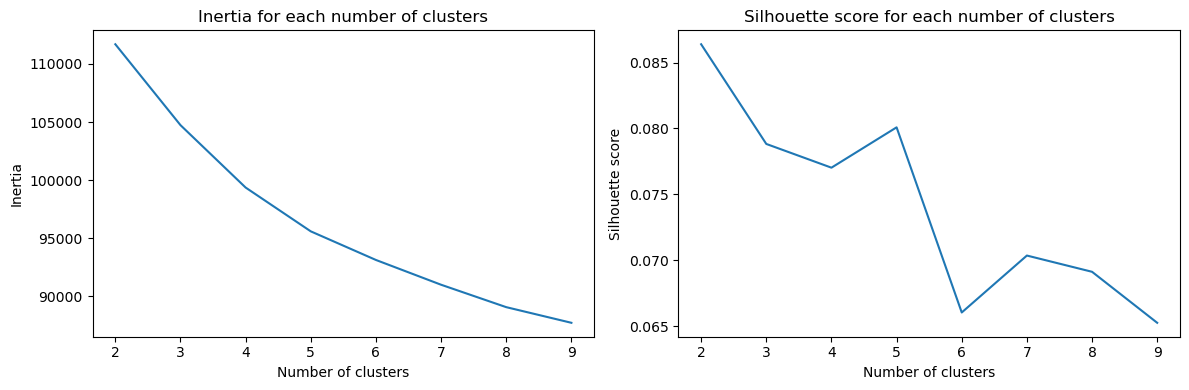

In [102]:
# New dataframe with the pca components that explain 95% of the variance
df_train_pca = pd.DataFrame(pca.transform(df_train_scaled)[:, :number_components], columns=[f"pca_{i}" for i in range(number_components)])

# Check how many clusters we need
inertia_result = []
silhouette_res = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_train_pca)
    inertia_result.append(kmeans.inertia_)
    silhouette_score_value = silhouette_score(df_train_pca, kmeans.fit_predict(df_train_pca))
    silhouette_res.append(silhouette_score_value)
    print(f"Number of clusters: {n_clusters}, inertia: {inertia_result[n_clusters - 2]:.2f}")

# plot the inertia for each number of clusters
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(range(2, 10), inertia_result)
ax[0].set_title(f"Inertia for each number of clusters")
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Inertia")
plt.tight_layout()

# plot the silhouette score for each number of clusters
#fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax[1].plot(range(2, 10), silhouette_res)
ax[1].set_title(f"Silhouette score for each number of clusters")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Silhouette score")
plt.tight_layout()




Lets choose 5 clusters and see if something useful can be found

In [103]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_pred = kmeans.fit_predict(df_train_pca)
df_train_dropna = df_train.dropna().copy()
df_train_dropna["cluster"] = cluster_pred

Count how many times a label shows up in a cluster.  

We can discern some patterns but some clusters(0,4 for example) have too many labels in them for it to be useful.

In [104]:
df_cluster = df_train_dropna.groupby("label")["cluster"].value_counts().reset_index(name="count")
pd.pivot_table(df_cluster, index="label", columns="cluster", values="count").fillna(0).style.background_gradient()
#, aggfunc="sum")
#cond = df_cluster["label"].isin(["baby", "strong", "cloud", "big", "welcome", "name", "no"])
#df_cluster[cond]

cluster,0,1,2,3,4
label,,,,,
afternoon,12.000000,0.000000,0.000000,1.000000,4.000000
baby,2.000000,6.000000,0.000000,3.000000,3.000000
big,12.000000,0.000000,0.000000,4.000000,4.000000
born,6.000000,4.000000,1.000000,5.000000,2.000000
bye,9.000000,0.000000,0.000000,3.000000,5.000000
calendar,11.000000,1.000000,0.000000,1.000000,4.000000
child,10.000000,2.000000,0.000000,9.000000,4.000000
cloud,0.000000,1.000000,14.000000,0.000000,0.000000
come,11.000000,1.000000,0.000000,7.000000,3.000000


In [105]:
df_train_dropna.mean()

0             -0.179197
1              0.642123
2              2.331419
3             -0.196658
4              0.457906
                ...    
237            0.474945
238            0.419360
239            0.522439
label_code    15.581614
cluster        1.787992
Length: 242, dtype: float64

In [106]:
df_train_dropna.groupby("cluster").mean()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,label_code
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.190215,0.688156,2.371870,-0.206344,0.502956,2.416294,-0.333332,0.374034,2.368570,-0.047087,...,0.376911,0.622745,0.451308,0.444158,0.445767,0.524463,0.451197,0.411611,0.536257,14.476440
1,-0.239459,0.674580,2.331474,-0.255700,0.489302,2.379966,-0.381084,0.364198,2.330378,-0.104392,...,0.414748,0.605718,0.444916,0.466348,0.417867,0.524857,0.461471,0.436472,0.523819,16.232558
2,-0.152800,0.661199,2.349324,-0.168666,0.481585,2.384859,-0.296710,0.364091,2.335988,-0.011009,...,0.391686,0.648490,0.431976,0.460609,0.454621,0.514832,0.483638,0.439395,0.509979,15.012987
3,0.051773,0.621562,2.232269,0.042988,0.436089,2.263989,-0.085749,0.314003,2.216391,0.203732,...,0.427480,0.594525,0.453298,0.473089,0.477522,0.496462,0.512091,0.412303,0.511194,17.439394
4,-0.488361,0.542760,2.375649,-0.523323,0.359040,2.415493,-0.637836,0.241293,2.338116,-0.371304,...,0.395444,0.637703,0.431821,0.427906,0.480857,0.511806,0.469864,0.420839,0.519608,15.377778


Lets prepare three dataframes/files for different mean imputations.  
-  Mean of column
-  Take value from most correlated column on the same missing row
-  Take the mean of the value from the same label and column

dfsfs

In [114]:
# 1.
df_train_imp_mean = df_train.fillna(df_train.mean())
# 2.
df_train_imp_mean_corr = df_train.copy()
for idx, col in enumerate(cols_with_missing):
    cond = df_train_imp_mean_corr[col].isna()
    df_train_imp_mean_corr.at[cond, col] = df_train_imp_mean_corr[corr_cols[idx]][cond]
# 3.
df_train_imp_label = df_train.copy()
# dataframe for looking up mean value per column and label
df_label_mean = df_train.groupby("label").mean().reset_index()

for col in df_train_imp_label:
    # for each column in df_train_imp_label find the rows with missing values
    cond = df_train_imp_label[col].isna()
    # for each column in df_train_imp_label find the rows with missing values and get the label
    labels = df_train_imp_label[cond]["label"]
    # for each column in df_train_imp_label find the rows with missing values and get the mean value for the label
    mean_values = df_label_mean[df_label_mean["label"].isin(labels)][col]
    # for each column in df_train_imp_label find the rows with missing values and set the mean value for the label
    df_train_imp_label.at[cond, col] = mean_values









